In [13]:
#Melakukan install library feature engine
!pip install feature_engine

In [14]:
#Melakukan import data dari dari gdrive dengan
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
#Import library pandas untuk melakukan pengolahan dataframe
import pandas as pd

file_path = '/content/drive/MyDrive/bodyfat.csv'

#Melakukan pengubahan dataset menjadi dataframe
df = pd.read_csv(file_path)

# Tampilkan keseluruhan dataframe
df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [16]:
#Melakukan identifikasi setiap kolom seperti type data kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [17]:
#Melakukan perhitungan nilai Nan pada setiap kolom
jumlah_nan=df.isna().sum()
print("Jumlah Nan dalam setiap kolom ")
#Menampilkan nilai Nan
print(jumlah_nan)

Jumlah Nan dalam setiap kolom 
Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64


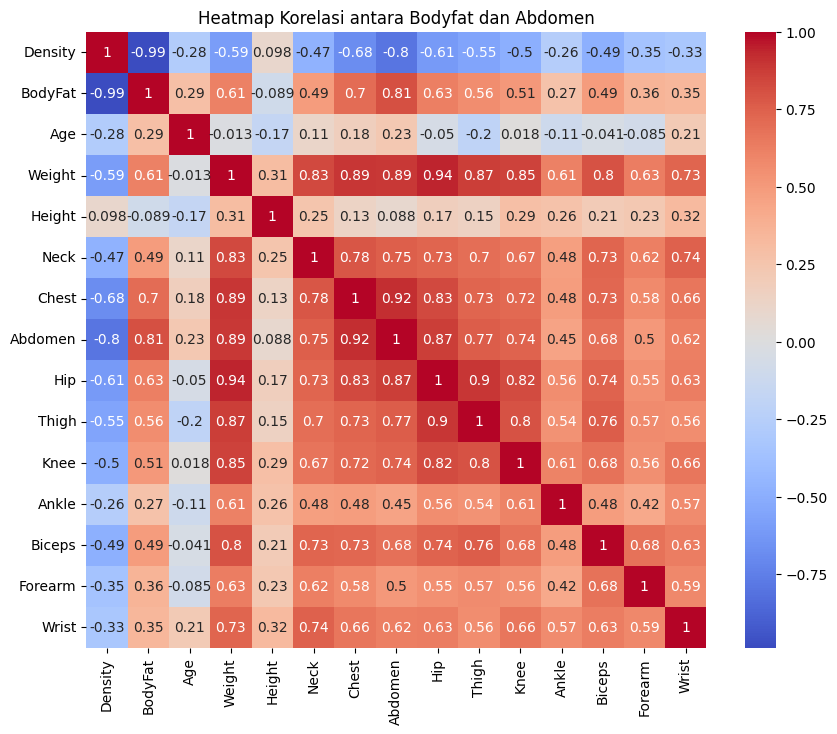

In [18]:
#Melakukan visualisasi menggunakan heat map untuk mengetahui kolom target dan feature
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat heatmap menggunakan seaborn
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Menambahkan judul plot
plt.title('Heatmap Korelasi antara Bodyfat dan Abdomen')

# Menampilkan plot
plt.show()

In [19]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
#Menentukan kolom target dan kolom feature
X=df['BodyFat'].values.reshape(-1,1)
y=df['Abdomen'].values
#Melakukan pemisahan data train dan data test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
#Melakukan pelatihan model menggunakan Algoritma SVR
svr_model=SVR(C=1000,gamma=0.5,kernel='rbf')
svr_model.fit(X_train,y_train)
y_pred=svr_model.predict(X_test)
#Menghting nilai Mse
mse=mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error:{mse}')

Mean Squared Error:35.23139096130724


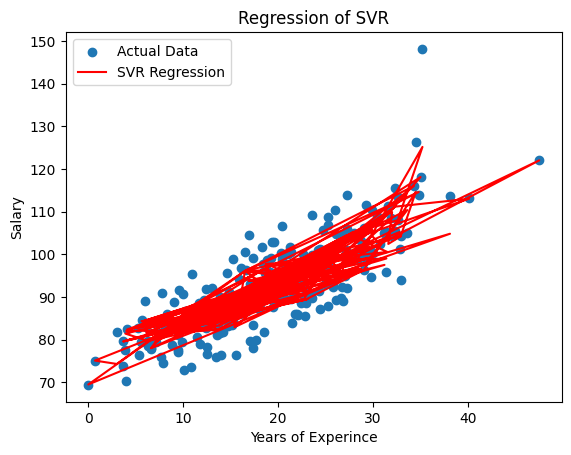

In [20]:
#Melakukan visualisasi
import matplotlib.pyplot as plt
plt.scatter(X,y,label='Actual Data')
plt.plot(X,svr_model.predict(X),color='red',label='SVR Regression')
#Melakukan pelabelan pada sumbu x dan sumbu y

plt.xlabel('Years of Experince')
plt.ylabel('Salary')

plt.title('Regression of SVR')

plt.legend()
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'kernel':['rbf'],
    'C':[1000,10000,100000],
    'gamma':[0.5,0.05,0.005]
}

#Insiasialisasi Grid Seach CV
grid_search=GridSearchCV(svr_model,param_grid,cv=5)
#Melakukan pencarian grid yang terbaik
grid_search.fit(X_train,y_train)

best_params=grid_search.best_params_
print(f'Best Parameters:{best_params}')

#Mendapatkan Model terbaik
best_model=grid_search.best_estimator_
#Menguji model
y_pred=best_model.predict(X_test)

#Melakukan perhtungan nilai Mse
mse=mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error on test:{mse}')

Best Parameters:{'C': 1000, 'gamma': 0.005, 'kernel': 'rbf'}
Mean Squared Error on test:25.184394541511157


In [22]:
#Melakukan pemodelan dengan menggunakan SVR setelah melakukan pencarian GridSearchCV
model_baru=SVR(C=10000,gamma=0.5,kernel='rbf')
model_baru.fit(X,y)

SVR(C=10000, gamma=0.5)

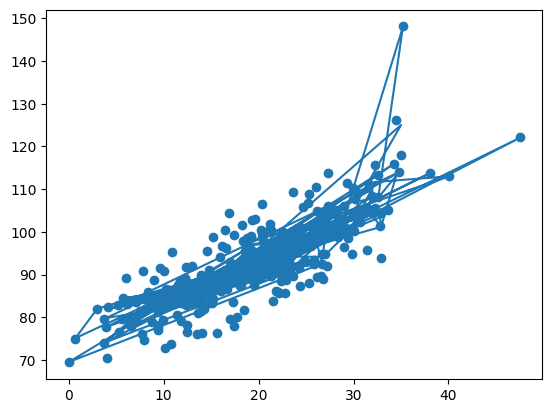

In [23]:
#Melakukan visualisasi
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.plot(X,model_baru.predict(X))